In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from pathlib import Path as path

import warnings
warnings.filterwarnings('ignore')


In [2]:
# paths for the directories
home_dir = path.cwd().parent                                  # home directory
data_dir = home_dir / 'data'                                  # data directory
iterim_data_dir = data_dir / 'interim'                        # interim data directory path
dataset_path = iterim_data_dir / "flat-house-dataset_v2.csv"  # dataset path

In [3]:
# loading the dataset into pandas dataframe
df = pd.read_csv(dataset_path)

# checking few rows from the dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score,area_room_ratio
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3.0,3,2,...,1730.00,NaN,0,0,0,0,0,0,65,576.666667
1,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,3,3+,...,1338.29,986.41,1,0,0,1,0,0,86,667.666667
2,flat,umang winter hills,sector 77,0.75,5589.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up...,2.0,2,2,...,1140.00,969.00,0,0,0,0,1,0,102,671.000000
3,flat,shree vardhman flora,sector 90,0.92,4718.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3.0,3,2,...,NaN,1950.00,0,0,0,1,0,0,49,650.000000
4,flat,dlf park place,sector 54,4.85,30180.0,1607.0,Super Built up area 1983(184.23 sq.m.)Built Up...,3.0,4,3+,...,1785.00,1607.00,1,0,0,0,0,1,158,535.666667


In [4]:
# checking missing values in the dataset
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 15
facing                 1004
agePossession             0
super_built_up_area    1673
built_up_area          1961
carpet_area            1711
servant room              0
others                    0
pooja room                0
study room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### built_up_area

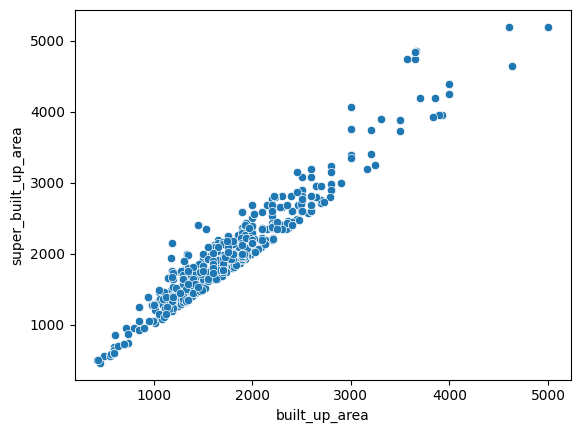

In [5]:
sns.scatterplot(data= df, x=df['built_up_area'], y=df['super_built_up_area']);

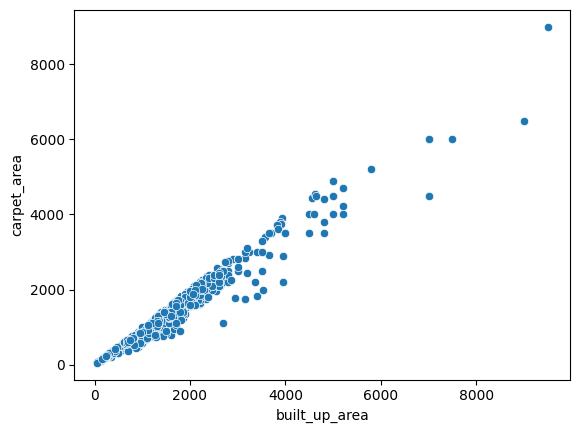

In [6]:
sns.scatterplot(data=df, x=df['built_up_area'], y=df['carpet_area']);

In [7]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3541    False
3542    False
3543    False
3544    False
3545    False
Length: 3546, dtype: bool

In [8]:
# seperating the rows, where all values in present under `super_built_up_area`, `built_up_area` & `carpet_area` columns
all_present_df = df[~((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

print(f"Total rows where all values in present under `super_built_up_area`, `built_up_area` & `carpet_area` columns: {all_present_df.shape}")

Total rows where all values in present under `super_built_up_area`, `built_up_area` & `carpet_area` columns: (3546, 24)


In [9]:
super_to_built_up_ratio = (all_present_df['super_built_up_area'] / all_present_df['built_up_area']).median()
super_to_built_up_ratio

1.111864406779661

In [10]:
carpet_to_built_up_ratio = (all_present_df['carpet_area'] / all_present_df['built_up_area']).median()
carpet_to_built_up_ratio

0.8888888888888888

In [11]:
# `super_built_up_area` and `carpet_area` are present but have missing values in `built_up_area`
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df[['super_built_up_area', 'built_up_area', 'carpet_area']].head()

,super_built_up_area,built_up_area,carpet_area
12,1991.0,NaN,1500.00
44,2100.0,NaN,1720.00
52,1276.0,NaN,904.01
54,1860.0,NaN,1300.00
61,1818.0,NaN,1300.00


In [12]:
# filling the missing values in `built_up_area`
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] / 1.111) + (sbc_df['carpet_area'] / 0.8888))/2), inplace=True)

In [13]:
sbc_df['built_up_area'].isnull().sum()

0

In [14]:
# updating the main dataframe
df.update(sbc_df)

In [15]:
# checking the missing values
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 15
facing                 1004
agePossession             0
super_built_up_area    1673
built_up_area          1540
carpet_area            1711
servant room              0
others                    0
pooja room                0
study room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [16]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [17]:
sb_df[['super_built_up_area', 'built_up_area', 'carpet_area']]

,super_built_up_area,built_up_area,carpet_area
6,1538.0,NaN,NaN
9,1099.0,NaN,NaN
19,2358.0,NaN,NaN
23,1895.0,NaN,NaN
24,3400.0,NaN,NaN
...,...,...,...
3521,1931.0,NaN,NaN
3529,1350.0,NaN,NaN
3531,1755.0,NaN,NaN
3532,2010.0,NaN,NaN


In [18]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area'] / 1.111), inplace=True)

In [19]:
df.update(sb_df)

In [20]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 15
facing                 1004
agePossession             0
super_built_up_area    1673
built_up_area           667
carpet_area            1711
servant room              0
others                    0
pooja room                0
study room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# sb null c is present built up null
# c_df

c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [22]:
c_df[['super_built_up_area', 'built_up_area', 'carpet_area']].head()

,super_built_up_area,built_up_area,carpet_area
3,NaN,NaN,1950.0
13,NaN,NaN,1225.0
15,NaN,NaN,526.0
25,NaN,NaN,600.0
26,NaN,NaN,690.0


In [23]:
c_df['built_up_area'].fillna(round(c_df['carpet_area'] / 0.8888), inplace=True)

In [24]:
df.update(c_df)

In [25]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 15
facing                 1004
agePossession             0
super_built_up_area    1673
built_up_area             0
carpet_area            1711
servant room              0
others                    0
pooja room                0
study room                0
store room                0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

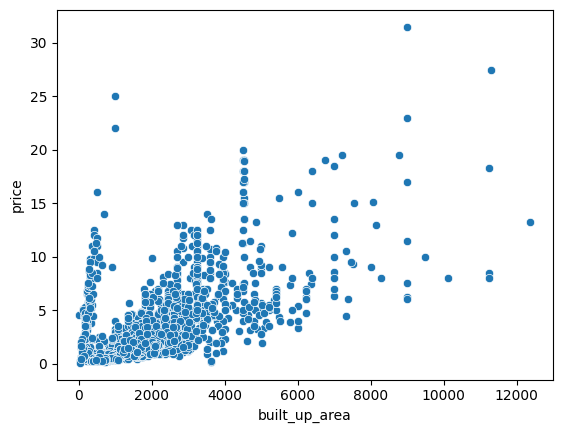

In [26]:
sns.scatterplot(data=df, x=df['built_up_area'], y=df['price']);

In [27]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]

anamoly_df.head()

,price,area,built_up_area
4,4.85,1607.0,1785.0
17,3.35,1242.0,1242.0
36,4.50,3150.0,14.0
54,2.79,1860.0,1568.0
59,4.49,1836.0,1836.0


In [28]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [29]:
df.update(anamoly_df)

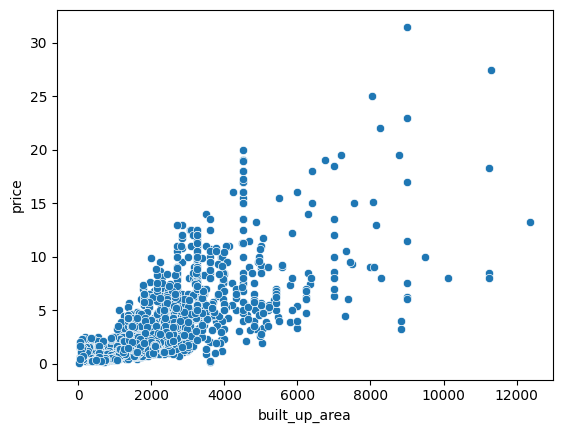

In [30]:
sns.scatterplot(data=df, x=df['built_up_area'], y=df['price']);

In [31]:
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace=True)

In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,3.0,3,2,9.0,East,Relatively New,1730.00,0,0,0,0,0,0,65
1,flat,experion the heartsong,sector 108,1.68,8387.0,3.0,3,3+,4.0,East,Relatively New,1338.29,1,0,0,1,0,0,86
2,flat,umang winter hills,sector 77,0.75,5589.0,2.0,2,2,8.0,South,Relatively New,1140.00,0,0,0,0,1,0,102
3,flat,shree vardhman flora,sector 90,0.92,4718.0,3.0,3,2,6.0,North,Relatively New,2194.00,0,0,0,1,0,0,49
4,flat,dlf park place,sector 54,4.85,30180.0,3.0,4,3+,6.0,North,Moderately New,1607.00,1,0,0,0,0,1,158


In [33]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             15
facing             1004
agePossession         0
built_up_area         0
servant room          0
others                0
pooja room            0
study room            0
store room            0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNUm

In [34]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
336,house,jacob pura,sector 12,0.35,9722.0,2.0,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,2,0
592,house,independent,sector 24,1.45,2984.0,3.0,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,2,9
719,house,independent,sector 3,1.50,10288.0,3.0,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,2,0
1065,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,2,0
1170,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,2,21
1215,house,independent,sector 26,4.60,12198.0,4.0,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,2,28
1314,house,independent,sector 25,13.00,45710.0,6.0,8,3+,NaN,NaN,Relatively New,2844.0,1,0,1,1,1,1,0
1346,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4,2,NaN,East,Moderately New,3240.0,1,0,1,0,1,2,88
1352,house,independent,sector 4,0.65,11111.0,4.0,2,2,NaN,NaN,Moderately New,585.0,0,0,0,0,0,2,0
1573,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4,3+,NaN,West,Moderately New,2800.0,1,0,1,0,0,0,130


In [35]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [36]:
df['floorNum'].fillna(2.0, inplace=True)

In [37]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1004
agePossession         0
built_up_area         0
servant room          0
others                0
pooja room            0
study room            0
store room            0
furnishing_type       0
luxury_score          0
dtype: int64

In [38]:
df['facing'].isnull().sum()/df.shape[0]

0.28313592780597857

### facing

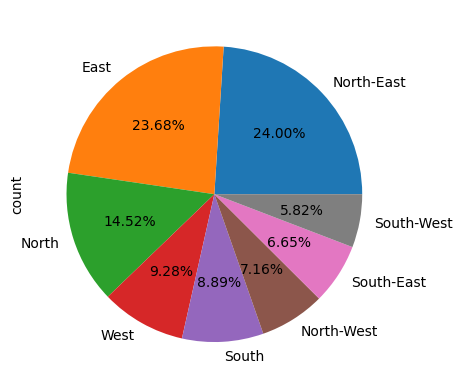

In [39]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%');

In [40]:
df.drop(columns=['facing'], inplace=True)

In [41]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
1251,flat,sbtl caladium,sector 109,1.20,6383.0,3.0,2,2,8.0,Relatively New,1692.0,0,0,0,0,0,2,151
142,flat,signature global park,sector 2,0.55,6691.0,2.0,2,3,3.0,Undefined,925.0,0,0,0,0,0,2,58
2324,flat,ss the leaf,sector 85,2.13,7575.0,4.0,4,3,6.0,Relatively New,2600.0,0,0,0,0,0,2,49
3533,flat,breez global heights,sector 2,0.25,7003.0,1.0,1,1,1.0,Relatively New,387.0,0,0,0,0,0,2,57
295,house,ansal sushant residency,sector 57,4.60,17037.0,6.0,6,3,3.0,Old Property,2700.0,1,0,1,1,1,1,102


In [42]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
others             0
pooja room         0
study room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossesion

In [43]:
df['agePossession'].value_counts()

agePossession
Relatively New        1601
New Property           556
Moderately New         544
Old Property           292
Undefined              291
Under Construction     262
Name: count, dtype: int64

In [44]:
df['agePossession'].value_counts()['Undefined']

291

In [45]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
8,house,independent,sector 50,13.20,27155.0,6.0,6,0,2.0,Undefined,4861.0,0,0,0,0,0,2,0
15,flat,tulip lemon,sector 69,0.60,11407.0,2.0,1,1,11.0,Undefined,592.0,0,0,0,0,0,2,0
25,flat,sobha smriti apartments,sector 56,0.50,8333.0,1.0,1,2,3.0,Undefined,675.0,0,0,0,0,0,2,0
41,house,independent,sector 2,0.70,7778.0,1.0,1,0,1.0,Undefined,900.0,0,0,0,0,0,2,0
51,flat,global hill view,sector 11,0.33,4269.0,2.0,2,0,11.0,Undefined,761.0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,flat,belgravia resort residences,sector 48,3.45,18459.0,3.0,3,3,14.0,Undefined,1869.0,0,0,0,0,0,2,0
3495,flat,imperia elvedor,sector 37c,0.55,8221.0,1.0,1,0,5.0,Undefined,669.0,0,0,0,0,0,2,0
3497,flat,raheja vedaanta,sector 108,1.00,4854.0,2.0,2,2,0.0,Undefined,2060.0,0,0,0,0,0,2,0
3515,flat,hcbs sports ville,sector 2,0.38,5067.0,2.0,2,2,9.0,Undefined,750.0,0,0,0,0,0,2,0


In [46]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [47]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [48]:
df['agePossession'].value_counts()

agePossession
Relatively New        1716
New Property           595
Moderately New         580
Old Property           324
Under Construction     276
Undefined               55
Name: count, dtype: int64

In [49]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [50]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [51]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           596
Moderately New         587
Old Property           327
Under Construction     276
Undefined               34
Name: count, dtype: int64

In [52]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [53]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [54]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately New         619
New Property           596
Old Property           327
Under Construction     276
Name: count, dtype: int64

In [55]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
others             0
pooja room         0
study room         0
store room         0
furnishing_type    0
luxury_score       0
dtype: int64

In [58]:
# saving the dataset
interim_dir = data_dir / 'interim'
file_name = interim_dir / 'flat-house-dataset_v2.csv'

df.to_csv(file_name, index=False)